***Double click*** and enter your name here!

Name: Qianwen Luo

# Lab 5, Part II: Networks in Python
Welcome to the coding section of Lab 5. Here, we'll learn how to take the intuition we gained about networks from Part I and apply it in a programming setting.

The main package that we use to create and manipulate networks in Python is called ```networkx```. To use it, we ```import networkx as nx```.

In addition to helping us create networks, ```networkx``` also calculates clustering coefficient, centrality, degree, and more for us so that we don't have to do it by hand. In other words, it helps us analyze the networks we create.

>NOTE: Another name for a network is a "graph." Though different from the bar graphs and line graphs that you may be used to seeing, networks are considered to be another type of graph. ```networkx``` often refers to networks as graphs.

### Problem 5: You're a Shining Star (contd.) (3 points)
In this problem, we'll learn the two main ways of creating a custom network in ```networkx```. To start, we'll be making the network from Part I, Problem 2.

The first method of creating a custom network in ```networkx``` involves a list of tuples. Note that we've worked with lists of tuples before in Lab 3, Problem 2.

In a ```networkx``` context, we use a tuple to represent an edge. For example, ```(5,0)``` represents an edge from node 5 to node 0. In order to make the network from problem 2 using the first method, we need to do the following:

1.   Make a list of edges
2.   Make an undirected graph using ```graph_name = nx.Graph()```
3.   Add the edges from the list to the graph using ```graph_name.add_edges_from(list_of_edges)```
4.   Visualize the graph using ```nx.draw()```.

**5.A** (2 points) Use the codeblock below (and the instructions above) to create the network from Part I, Problem 2.

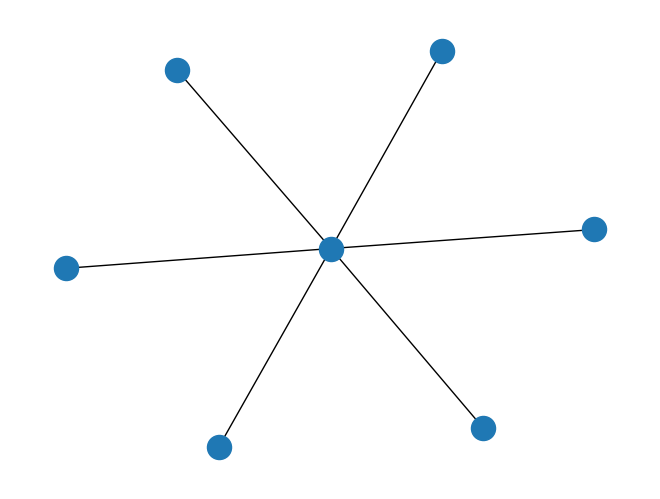

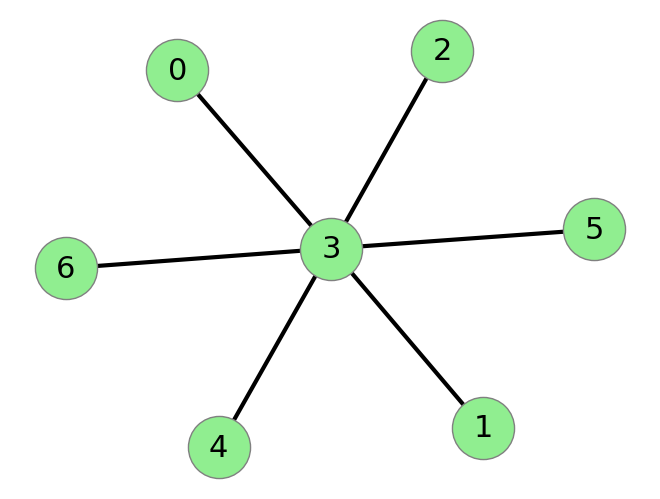

In [ ]:
# We need to import networkx and matplotlib
import networkx as nx
import matplotlib.pyplot as plt

# Now we can create our list of edges. Because this is an undirected graph, you only need to specify in one direction.
edge_list = [(0, 3), (1, 3), (2, 3), (4, 3), (5, 3), (6, 3)] # <-- Add all 6 edges here

# Make a new graph
problem2_network = nx.Graph()
problem2_network.add_edges_from(edge_list) # <-- Add our list of edges to problem2_network

# This sets the layout of the nodes, we'll use the spring layout for now
problem2_network.pos = nx.spring_layout(problem2_network)

# This draws our graph (simplest visualization)
nx.draw(problem2_network, pos = problem2_network.pos)
plt.figure()

# This draws our graph more nicely because I set up labels, font size, and colors
nx.draw(problem2_network, pos = problem2_network.pos, with_labels = True, font_size = 22, font_color = "black", node_size = 2000, width = 3, node_color = "lightgreen", edgecolors = "grey")

The second method of creating a custom network in python is to use the adjancency matrix. We can set that up as a numpy array, and then pass it to ```networkx``` using ```graph_name = nx.from_numpy_array(array_name)```.

**5.B** (1 point) Use the codeblock below to create the same network again using the adjancency matrix. As in Part I, Problem 2E, I've completed the first column of the matrix for you.

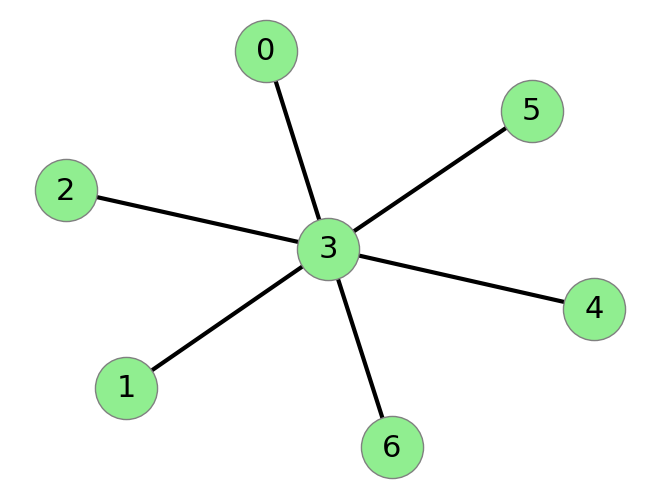

In [ ]:
# We need to import numpy now
import numpy as np

# Now we can create our adjacency matrix using a numpy array

adjacency_matrix = np.array([[0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 0, 1, 0, 0, 0],
                            [1, 1, 1, 0, 1, 1, 1],
                            [0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 0, 1, 0, 0, 0]])

# Make a new graph
problem2_network = nx.from_numpy_array(adjacency_matrix) # <-- What function do we use to make a network from a numpy array?

# This sets the layout of the nodes, we'll use the spring layout for now
problem2_network.pos = nx.spring_layout(problem2_network)

# This draws our graph nicely because I set up labels, font size, and colors
nx.draw(problem2_network, pos = problem2_network.pos, with_labels = True, font_size = 22, font_color = "black", node_size = 2000, width = 3, node_color = "lightgreen", edgecolors = "grey")

### Problem 6: Node Attributes, Return of the Dictionaries (2 points)

Now that we have a working graph, let's learn how to get a list of neighbors and change their attributes. In this problem, let's change the color of all of node 3's neighbors.

Nodes in python are sort of like classes in that we can give them properties like species, color, type, etc. Properties in ```networkx``` are called attributes. To give every node in the network a new attribute, we use:

```nx.set_node_attributes(network_name, attribute_default_value, attribute_name)```

We can then edit an attribute of a specific node using:

```network_name[node_index][attribute_name] = new_value```

Remember dictionaries from Lab 2, Problem 3? Node attributes are stored inside dictionaries. In fact, nodes themselves are represented in the computer as tuples. Element 0 of the tuple contains the index of the node, and element 1 contains a dictionary with all of the node's attributes.

To get a list of nodes with attributes, we use:

```network_name.nodes(data = True)```

**6.A** (1 point) Using the information above, make a new attribute for our network called ```"color"```, and set the default value of color to be ```"lightgreen"```. Then, ```print(problem2_network.nodes(data = True))``` to visualize the list of nodes.
>You should observe a list of tuples. The first element of each tuple is the node's index (0 through 6), and the second element of each tuple is the node's dictionary of attributes, including ```'color'```, which you just created.

In [ ]:
# First, give the nodes in problem2_network an attribute called "color" and set it to "lightgreen" (default)
nx.set_node_attributes(problem2_network, "lightgreen", "color") # <-- Add an attribute called "color" to problem2_network, and set its default value to be "lightgreen"

# Now, use the print command above to visualize the list of nodes
print(problem2_network.nodes(data=True)) # <-- Your print command goes here

[(0, {'color': 'lightgreen'}), (1, {'color': 'lightgreen'}), (2, {'color': 'lightgreen'}), (3, {'color': 'lightgreen'}), (4, {'color': 'lightgreen'}), (5, {'color': 'lightgreen'}), (6, {'color': 'lightgreen'})]


____
#### **↯ Optional Reading: Node Data View objects ↯**


Okay, so I sort of lied about ```network_name.nodes(data = True)``` being a list of tuples. It's actually a really goofy and weird thing called a "Node Data View" object. Node data view objects follow different rules from normal lists.

Specifically, if you iterate through a Node Data View object using a ```for``` loop, it acts like a normal list of tuples. Element 0 of the tuple is the index of the node, and element 1 of the tuple is the node's dictionary of attributes.

However, say you're trying to get a single element of a node data view object, like this:

```network_name.nodes(data = True)[0]```

Instead of recieving a tuple, this command will return only the dictionary of attributes associated with node 0.

Basically, just remember that ```network_name.nodes(data = True)``` will act like a list of tuples in the context of a ```for``` loop, and a list of attribute dictionaries in most other contexts.

This is crazy bananas and I don't understand why they designed it this way, don't shoot the messenger.
_____

#### □
To set all of node 3's neighbors to a different color, we need a function that finds all of the neighbors of a certain node. Luckily, ```networkx``` already has one for us!

To obtain a list of neighbors of a certain node with index ```node_index```, we can use

```neighbor_list = list(network_name.neighbors(node_index))```

Once we find the neighbors of node 3, we need to iterate through the list of neighbors and change the ```"color"``` attribute of each neighbor.

Finally, we need to loop through every node and add all of the ```"color"``` attributes to a list called ```color_list```. ```nx.draw()``` needs this color list in order to assign the correct color to each node when it creates a visualization.

**6.B** (1 point) Use the instructions above to change the color of all of node 3's neighbors. You can use ```"red"```, ```"yellow"```, ```"purple"```, or whatever other color you want!

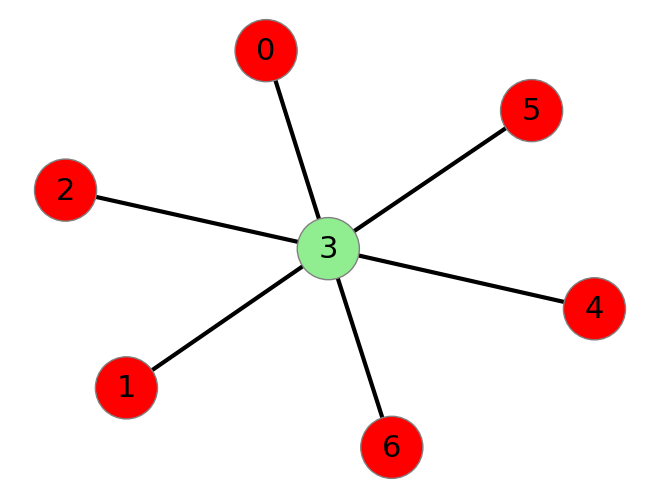

In [ ]:
# We get a list of node 3's neighbors
neighbor_list = list(problem2_network.neighbors(3)) # <-- Find node 3's neighbors using the given line of code

# We go through node 3's neighbor list and set all of node 3's neighbors' color to "red" or something else
for neighbor in neighbor_list:
   problem2_network.nodes[neighbor]["color"] = "red" # <-- Set node 3's neighbors to a different color!

# Make a list of colors, start it as a blank list
color_list = []

# Fill the color list by looping through all of the nodes and appending a color in the correct index
for current_node in problem2_network.nodes:
  current_node_color = problem2_network.nodes[current_node]["color"]
  color_list.append(current_node_color) # <-- Add the current node's color to the color list

# Draw the network, with color_list as our list of colors
nx.draw(problem2_network, pos = problem2_network.pos, with_labels = True, font_size = 22, font_color = "black", node_size = 2000, width = 3, node_color = color_list, edgecolors = "grey")

### Problem 7: Clock Says Zero (contd.) (3 points)
In the codeblock below, use the skills that you learned in Problem 5 to recreate the network from Part I, Problem 3. Call it ```problem3_network```.

You may use either the list of tuples method or the adjancency matrix method to accomplish this. The quickest way to do this problem will be to copy and paste your code from problem 5 and edit the specific entries. Take note of the syntax changes needed, which are specified below.
>*Tuples Method*: If you use the list of tuples method, you need to use ```nx.DiGraph()``` instead of ```nx.Graph()```. "DiGraph" stands for directed graph.

>*Matrix Method*: If you use the adjacency matrix method, you also need to add a piece of code to tell ```networkx``` that your network is directed. That looks like this: ```graph_name = nx.from_numpy_array(array_name, create_using=nx.DiGraph())```.

After you've finished, generate a visualization of the graph using the spring layout. If you've copied and pasted, remember to change ```problem2_network``` to ```problem3_network``` when creating a new visualization.

In [ ]:
# <-- Your code goes here
# We need to import numpy now
import numpy as np

# Now we can create our adjacency matrix using a numpy array

adjacency_matrix1 = np.array([[0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 1, 0, 0, 1],
                            [1, 0, 0, 1, 0, 1, 0],
                            [1, 1, 1, 0, 1, 1, 1],
                            [0, 1, 0, 1, 0, 0, 0],
                            [0, 0, 0, 1, 1, 0, 0],
                            [1, 0, 0, 1, 0, 0, 0]])

problem3_network = nx.from_numpy_array(adjacency_matrix1, create_using=nx.DiGraph())

# This sets the layout of the nodes, we'll use the spring layout for now
problem3_network.pos = nx.spring_layout(problem3_network)

# This draws our graph nicely because I set up labels, font size, and colors
nx.draw(problem3_network, pos = problem3_network.pos, with_labels = True, font_size = 22, font_color = "black", node_size = 2000, width = 3, node_color = "lightgreen", edgecolors = "grey")

plt.show()

### Problem 8: Love Stinks! Yeah, Yeah! (4 points)

> "You love her,
But she loves him,
And he loves somebody else,
You just can't win"

> -J. Geils Band, 1980

Your job in this problem is to visualize a love network with the following rules:

* Herbert loves Marsha
* Marsha loves Steve
* Steve loves Carmen, Maxine, and Xin
* Carmen loves Xin
* Bartholomew loves Nellie
* Nellie loves Herbert
* Xin loves Ruth and Carmen
* Ruth loves Maxine
* Maxine loves herself and Crazy Joe
* Crazy Joe doesn't love anybody

**8.A** (3 points) To get a better understanding of this mess of love connections, you have decided to make a directed network in which characters are represented by nodes and love is represented by directed edges.

You may copy and paste code from above to complete this problem.

If you want, you can look up how to label the nodes with names, but it will be easier to give numerical indices to the characters:

    0 — Bartholomew
    1 — Carmen
    2 — Herbert
    3 — Marsha
    4 — Maxine
    5 — Nellie
    6 — Ruth
    7 — Steve
    8 — Xin
    9 — Crazy Joe

> NOTE: You may use whatever node layout you like, but in my experience, ```nx.circular_layout()``` looks the nicest for visualizing this graph

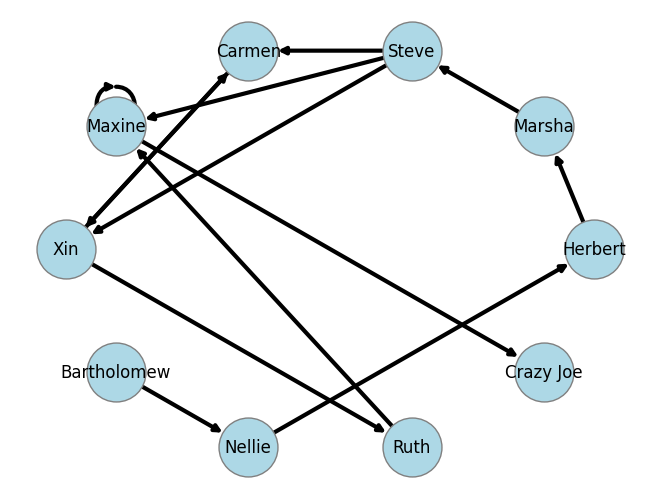

In [51]:
# <-- Your code for problem 8.A goes here
edge_list1 = [(2, 3), (3, 7), (7, 1), (7, 4), (7, 8), (1, 8), (0, 5), (5, 2), (8, 6), (8, 1), (6, 4), (4, 4), (4, 9)] # <-- Add all edges here

# Make a new graph
love_network = nx.DiGraph()
love_network.add_edges_from(edge_list1) # <-- Add our list of edges to problem2_network

# This sets the layout of the nodes, we'll use the spring layout for now
love_network.pos = nx.circular_layout(love_network)

# This draws our graph (simplest visualization)
# pnx.draw(love_network, pos = love_network.pos)

label_dict = {0:'Bartholomew', 1:'Carmen', 2:'Herbert', 3:'Marsha', 4:'Maxine',
              5:'Nellie', 6:'Ruth', 7:'Steve', 8:'Xin', 9:'Crazy Joe'}

# This draws our graph more nicely because I set up labels, font size, and colors
nx.draw(love_network, pos = love_network.pos, with_labels = True, labels=label_dict, font_size=12, font_color = "black", node_size = 1800, width = 3, node_color = "lightblue", edgecolors = "grey")

plt.show()

Representing connections using a network structure enables us to do some simple analysis. We can use the metrics we discussed in Part I of this lab to try and gain insight on various aspects of the network.

**8.B** (1 point) With this in mind, who has the highest in-degree? Who has the highest out-degree? What do these measures mean in the context of this example?

In [66]:
highest_indegree_node = max(love_network.in_degree(), key=lambda x: x[1])
highest_outdegree_node = max(love_network.out_degree(), key=lambda x: x[1])
print(label_dict[highest_indegree_node[0]], highest_indegree_node[1])
print(label_dict[highest_outdegree_node[0]], highest_outdegree_node[1])

Maxine 3
Steve 3


***Double click*** and write down your response here!

Maxine has the highest in-degree of 3. In the context of this example, it means that 3 people (Maxine, Steve, Ruth) love MAxine.

Steve has the highest out-degree of 3. In the context of this example, it means that Steve loves 3 people (Carmen, Maxine, and Xin).

**8.C** (Extra credit: 2 points) Choose a different network metric, measure it in the love network, and interpret the meaning of this result in context.

In [68]:
closeness_centrality = nx.closeness_centrality(love_network)
highest_closeness_centrality_node = max(closeness_centrality, key=closeness_centrality.get)
print(label_dict[highest_closeness_centrality_node], closeness_centrality[highest_closeness_centrality_node])


Maxine 0.3386243386243386
Maxine has the highest closeness centrality with a score of 0.34.


***Double click*** and write down your response here!

We can choose the closeness centrality as our network metric. This metric measures how close a node is to other nodes and the highest closeness centrality value indicates the average closeness of the node to all other nodes. By measuring it in the love network, we get that Maxine has the highest value of closeness centrality. This suggests that Maxine is the central figure and she might know better about what is happening (such as feelings and relstionships) within the network.  Maxine is the most reachable individual in terms of love relations and she has relatively short love distance to all others.

### Problem 9: Different Network Layouts (Extra credit: 3 points)

Thus far, we've been using mostly ```nx.spring_layout()``` to visualize our networks. Copy and paste your code from Problem 7 into the codeblock below. Then, try a few different layouts. Which one do you think looks the most organized? Which one looks the most disorderly?

Here are some other layouts that you might want to try:
* ```nx.circular_layout()```
* ```nx.kamada_kawai_layout()```
* ```nx.planar_layout()```
* ```nx.random_layout()```
* ```nx.spectral_layout()```
* ```nx.spiral_layout()```

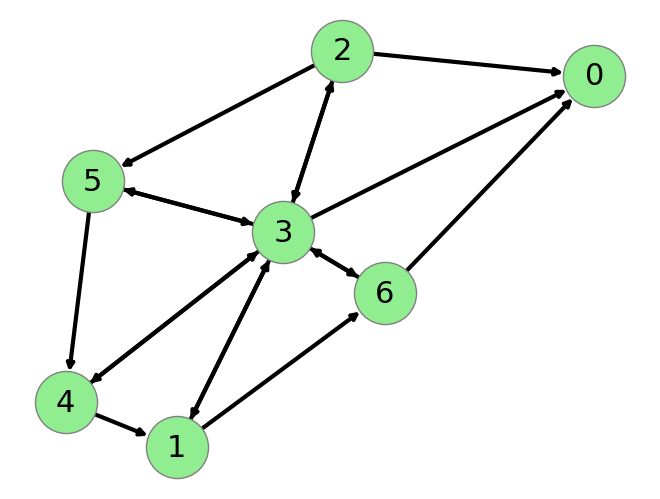

In [76]:
# <-- Your code for problem 9 goes here

# Now we can create our adjacency matrix using a numpy array

adjacency_matrix1 = np.array([[0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 1, 0, 0, 1],
                            [1, 0, 0, 1, 0, 1, 0],
                            [1, 1, 1, 0, 1, 1, 1],
                            [0, 1, 0, 1, 0, 0, 0],
                            [0, 0, 0, 1, 1, 0, 0],
                            [1, 0, 0, 1, 0, 0, 0]])

problem3_network = nx.from_numpy_array(adjacency_matrix1, create_using=nx.DiGraph())

problem3_network.pos = nx.spring_layout(problem3_network)

nx.draw(problem3_network, pos = problem3_network.pos, with_labels = True, font_size = 22, font_color = "black", node_size = 2000, width = 3, node_color = "lightgreen", edgecolors = "grey")



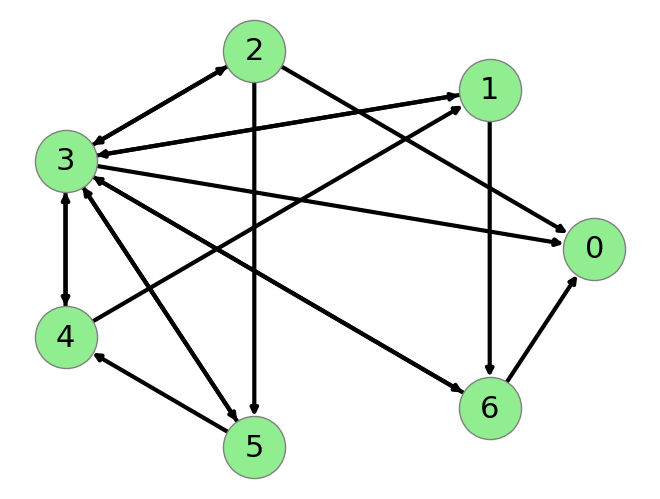

In [77]:
problem3_network.pos = nx.circular_layout(problem3_network)

nx.draw(problem3_network, pos = problem3_network.pos, with_labels = True, font_size = 22, font_color = "black", node_size = 2000, width = 3, node_color = "lightgreen", edgecolors = "grey")


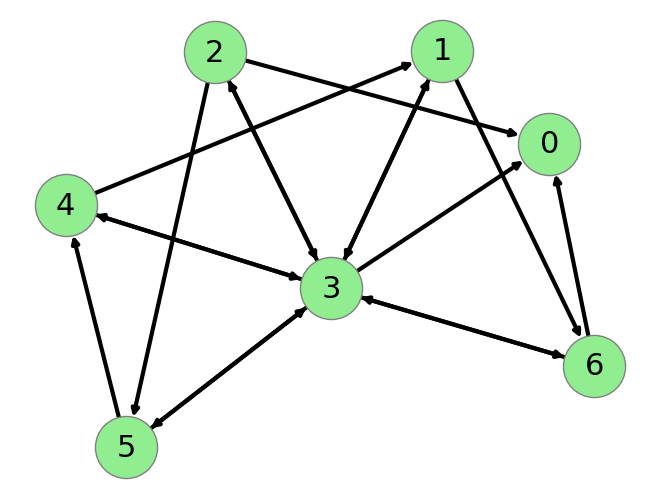

In [71]:
problem3_network.pos = nx.kamada_kawai_layout(problem3_network)

nx.draw(problem3_network, pos = problem3_network.pos, with_labels = True, font_size = 22, font_color = "black", node_size = 2000, width = 3, node_color = "lightgreen", edgecolors = "grey")


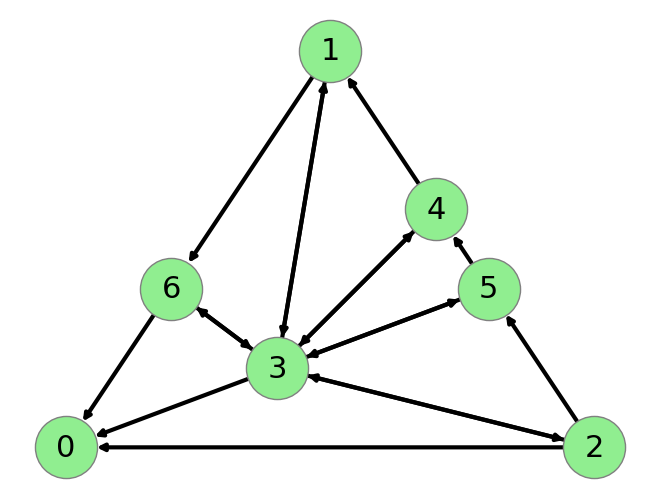

In [72]:
problem3_network.pos = nx.planar_layout(problem3_network)

nx.draw(problem3_network, pos = problem3_network.pos, with_labels = True, font_size = 22, font_color = "black", node_size = 2000, width = 3, node_color = "lightgreen", edgecolors = "grey")


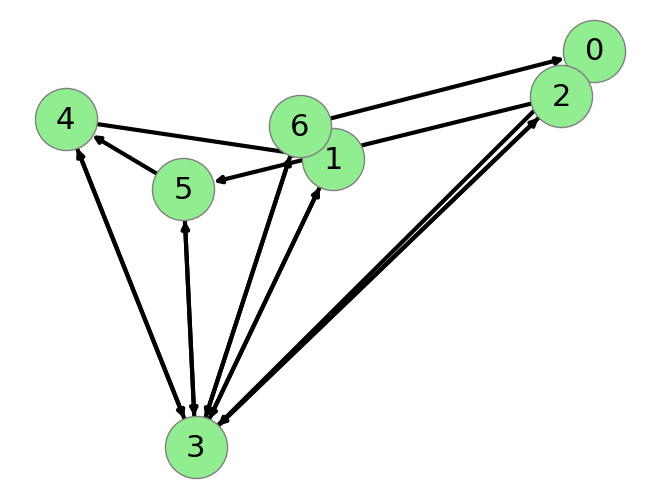

In [78]:
problem3_network.pos = nx.random_layout(problem3_network)

nx.draw(problem3_network, pos = problem3_network.pos, with_labels = True, font_size = 22, font_color = "black", node_size = 2000, width = 3, node_color = "lightgreen", edgecolors = "grey")


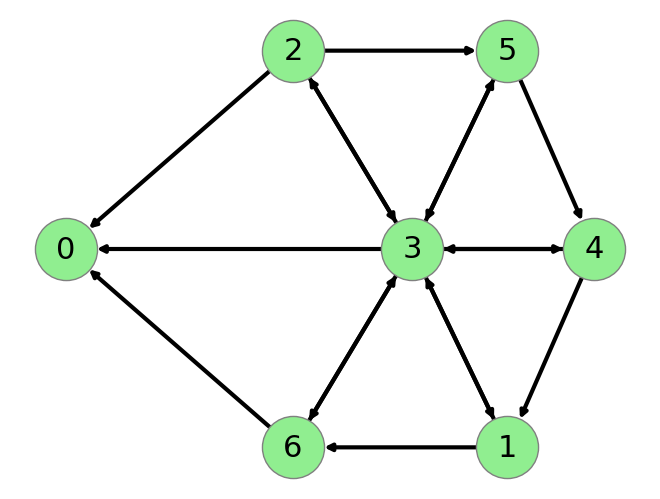

In [74]:
problem3_network.pos = nx.spectral_layout(problem3_network)

nx.draw(problem3_network, pos = problem3_network.pos, with_labels = True, font_size = 22, font_color = "black", node_size = 2000, width = 3, node_color = "lightgreen", edgecolors = "grey")


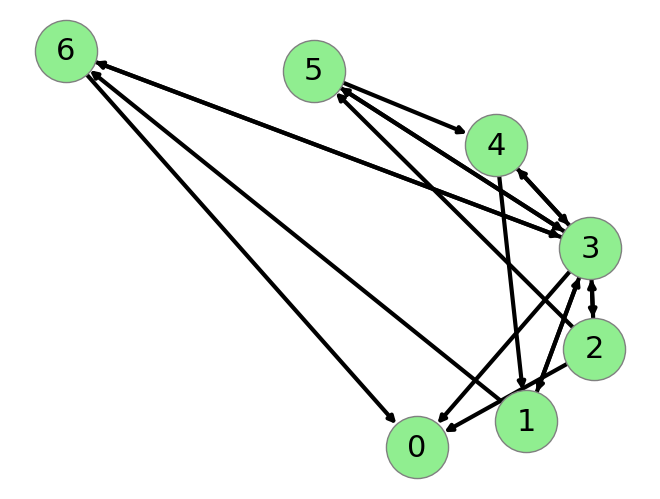

In [75]:
problem3_network.pos = nx.spiral_layout(problem3_network)

nx.draw(problem3_network, pos = problem3_network.pos, with_labels = True, font_size = 22, font_color = "black", node_size = 2000, width = 3, node_color = "lightgreen", edgecolors = "grey")


***Double click*** and write down your response to Problem 9 here!

From the graphs above, we observe that the random layour is the most disorderly due to the random positioning of nodes.

The most organized layout appears to be the spectral layout or the planar layout since these two greatly capture the network structure.
